![Loan Risk Assessment](AI-PT-01%20Loan%20Risk%20Assessment.png)'

# Predictive Modeling for Loan Approvals 

<!--
## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations
- Identifies key stakeholders and their needs
- Explains the implications of different types of model errors
- Justifies your choice between classification and regression approaches

2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact
- You must use at least two different metrics
- Consider creating custom metric
- Establish baseline performance targets
- Document your reasoning for each choice-->


## Overview


The final loan approval model substantially reduces expected financial cost while maintaining approval throughput, making it suitable for deployment with human-in-the-loop safeguards. Through careful preprocessing, cost-sensitive evaluation, and threshold tuning, I built a solution that outperforms naïve baselines by lowering costly false approvals while still identifying qualified applicants. Model performance is strongest for applicants with high creditworthiness and stable employment, while borderline cases remain better suited for manual review. These results demonstrate that predictive modeling can deliver measurable business value by automating low-risk approvals, focusing human judgment where it is most needed, and laying the foundation for a scalable, data-driven loan approval proces.


-----
## Business Understanding

At the time of this assessment, FinTech Innovations relied on a **manual loan review process** that depended heavily on human judgment. While this approach leveraged the expertise of loan officers, it also slowed decision-making, created inconsistent outcomes, and made it difficult to audit approvals at scale. A data-driven model offers the opportunity to streamline workflows, ensure consistency, and manage risk more effectively.

### Who’s impacted and what they need
- **Loan officers**: clear and consistent guidance to speed up reviews  
- **Risk and finance teams**: visibility into portfolio risk and the dollar impact of each decision  
- **Compliance teams**: transparent, auditable decisions that demonstrate fairness  
- **Applicants**: timely and fair responses that build trust in the process  

### Why errors matter
- **False positive (approving a risky loan)**: costs the business about **$50,000** on average  
- **False negative (denying a safe loan)**: costs about **$8,000** in lost revenue and dissatisfied customers  

Reducing false positives is the priority, but both error types have a real impact.

### Cost Matrix

| Predicted / Actual | Good Loan (1) | Risky Loan (0) |
|--------------------|---------------|----------------|
| **Approve (1)**    | $0            | $50,000 loss   |
| **Deny (0)**       | $8,000 loss   | $0             |

### How we will model the problem
I will treat this as a **classification task**, predicting whether a loan should be approved. This directly supports the binary decision the business needs and allows thresholds to be adjusted to reflect risk tolerance. Regression on a risk score is possible, but it adds unnecessary complexity since a cutoff would still be required.

### Goals and how we will measure success
- **Main goal**: lower the expected financial cost of decisions compared to simple rules (always approve, always deny, or predict the majority).  
- **Metrics**:  
  - *Custom Expected Cost*: primary metric, reflects the true business cost of errors  
  - *F-0.5 score*: emphasizes precision to limit costly approvals  
  - *PR-AUC*: evaluates performance under class imbalance  
- **Targets**: beat all baselines, with at least a **25–40% cost reduction** over the majority baseline.  

The end result should be a loan approval model that is fair, transparent, and financially sound. This will enable FinTech Innovations to serve customers more efficiently while safeguarding aainst avoidable financial losses.
ting against avoidable losses.  
ing against avoidable losses.  


-------

## Data Understanding

Two datasets are available for this project. Both describe loan applications and approval outcomes, but they differ in size, structure, and richness of features. Exploring each provides useful context, while focusing on the larger dataset ensures that the modeling results are robust.

### Dataset 1: `financial_loan_data.csv`
This dataset contains **20,000 rows and 35 columns**.  
- **Target variable**: `LoanApproved` (binary: 1 = approved, 0 = denied)  
- **Class balance**: 15,220 denied vs. 4,780 approved (approvals ≈ 24%)  
- **Features**:  
  - *Demographic*: Age, MaritalStatus, EducationLevel  
  - *Financial*: AnnualIncome, MonthlyIncome, account balances, ratios  
  - *Credit history*: CreditScore, BankruptcyHistory, RiskScore  
- **Distributions**: numeric variables such as AnnualIncome and LoanAmount are right-skewed with outliers, while categorical features like EmploymentStatus and EducationLevel have uneven group sizes.  
- **Relationships**: approvals are more common for applicants with higher CreditScore and AnnualIncome, while higher DebtToIncomeRatio and larger LoanAmount are associated with denials.  
- **Missing values**: concentrated in MaritalStatus, EducationLevel, and SavingsAccountBalance. These may indicate non-disclosure or the absence of certain account types.  
- **Data quality issues**: some income fields are stored as strings with symbols, and categorical labels may require case normalization.  

### Dataset 2: `Loan.csv`
This dataset contains **614 rows and 13 columns**.  
- **Target variable**: `Loan_Status` (Y = approved, N = denied), later encoded as `Loan_Status_bin`  
- **Class balance**: approvals are the majority (roughly 2:1), the reverse of Dataset 1  
- **Features**:  
  - *Demographic*: Gender, Married, Education, Dependents  
  - *Financial*: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History  
  - *Categorical*: Property_Area  
- **Distributions**: ApplicantIncome and LoanAmount are right-skewed, while categorical variables show imbalance across groups.  
- **Missing values**: occur in LoanAmount and Credit_History, likely reflecting incomplete applications or reporting gaps.  
- **Data quality issues**: the relatively small sample size may increase model variance.  

### Comparative Notes
- **Targets**: both datasets align to binary classification (`LoanApproved` vs. `Loan_Status_bin`).  
- **Imbalance**: Dataset 1 is skewed toward denials, while Dataset 2 is skewed toward approvals, reinforcing the need for imbalance-aware evaluation.  
- **Feature richness**: Dataset 1 is broader and more detailed, while Dataset 2 is smaller but useful for validating preprocessing methods.  

### Planned Visual Exploration
To guide modeling, I will rely on:  
- Histograms of numeric features such as CreditScore, LoanAmount, RiskScore, and Age  
- Boxplots comparing key variables by approval outcome  
- A correlation heatmap of numeric features  
- Stacked bar charts showing categorical features segmented by approval status  

### Feature Understanding
- **Numerical features**: Age, CreditScore, Experience, LoanAmount, balances, ratios, RiskScore  
- **Categorical features**: EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus, LoanPurpose, Property_Area  
- **Ordinal features**: EducationLevel can be mapped to a natural order  

Special preprocessing will be required for several features:  
- Income variables must be cleaned before numeric conversion  
- Categorical features will need encoding  
- Outliers in income and loan amounts may require log transformation or winsorization  
- Rare categories may need consolidation to avoid sparse splits  

### Missingness and Potential Meanings
- **Dataset 1**: MaritalStatus and EducationLevel may reflect non-disclosure, while missing SavingsAccountBalance likely indicates no account exists  
- **Dataset 2**: Missing LoanAmount and Credit_History may signal incomplete applications  

These patterns suggest that missingness indicator features could add predictive value.

### Potential Feature Engineering Opportunities
- Ratios such as Debt-to-Income or combined Applicant + Coapplicant income  
- Missingness flags to capture non-disclosure patterns  
- Grouping of rare categories in EmploymentStatus, EducationLevel, and Dependents  
- Log transformations for skewed variables like AnnualIncome and LoanAmount  
- Interaction terms such as CreditScore × DebtToIncomeRatio to highlight compound effects  

### Usage in This Lab
For modeling, evaluation, and business impact analysis, **Dataset 1 (`financial_loan_data.csv`) will serve as the primary dataset** due to its size and richness. **Dataset 2 (`Loan.csv`) will be used to validate preprocessing steps** and confirm that methods generalize to a smaller, simpler dataset.  

By conducting this exploratory analysis, I was able to identify both the strengths and limitations of each dataset. These findings shape the preprocessing strategy, highlight risks such as imbalance and missingness, and point to valuable feature engineering opportunities that can strengthen model performance.

In [218]:
# Imports
# =========================================
# Import Libraries
# =========================================

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score,
    fbeta_score, balanced_accuracy_score
)

# Utilities
import warnings
warnings.filterwarnings("ignore")

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [219]:
# =========================================
# Data Load
# =========================================

import pandas as pd
from pathlib import Path

# File paths (assumes notebook is in the same folder as the CSVs)
p1 = Path("financial_loan_data.csv")
p2 = Path("Loan.csv")

# Load datasets
df1 = pd.read_csv(p1)   # financial_loan_data.csv
df2 = pd.read_csv(p2)   # Loan.csv

print("financial_loan_data.csv:", df1.shape)
print("Loan.csv:", df2.shape)

# Peek at the first few rows
display(df1.head(3))
display(df2.head(3))

financial_loan_data.csv: (20000, 35)
Loan.csv: (20000, 36)


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0


In [220]:
# =========================================
# Detect targets from actual columns and provide a robust label converter
# =========================================

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Candidate target names we support (order = preference)
TARGET_CANDIDATES = ["LoanApproved", "Loan_Status_bin", "Loan_Status"]

def detect_target(df, candidates=TARGET_CANDIDATES):
    for c in candidates:
        if c in df.columns:
            return c
    raise ValueError(
        f"No known target column found. Checked: {', '.join(candidates)}. "
        f"Available columns include: {list(df.columns[:10])}..."
    )

def make_binary_label(s: pd.Series) -> pd.Series:
    """
    Return a binary Int64 series from the given target series s, without mutating df.
    Supports numeric {0,1} and string {Y,N,true,false,'1','0'}.
    """
    if s.dtype.kind in "biu":  # int/bool
        return s.astype("Int64")
    if s.dtype.kind == "f":    # float that may be 0/1
        return s.round().astype("Int64")
    mapped = (
        s.astype(str).str.strip().str.upper()
         .map({"Y": 1, "N": 0, "TRUE": 1, "FALSE": 0, "1": 1, "0": 0})
    )
    if mapped.notna().mean() > 0.9 and mapped.nunique(dropna=True) <= 2:
        return mapped.astype("Int64")
    raise ValueError("Target could not be safely mapped to binary labels.")

# Detect targets from actual columns
TARGET_DF1 = detect_target(df1)
TARGET_DF2 = detect_target(df2)

print("Detected targets:")
print(" - TARGET_DF1:", TARGET_DF1)
print(" - TARGET_DF2:", TARGET_DF2)

# Quick peek at class balance (non-mutating)
def peek_balance(df, target_col):
    y = df[target_col]
    try:
        yb = make_binary_label(y)
        vc = yb.value_counts(dropna=False).rename({1: "positive", 0: "negative"})
        print(f"Class counts for {target_col}:", dict(vc))
    except Exception as e:
        print(f"Could not binarize {target_col} for counts: {e}")

peek_balance(df1, TARGET_DF1)
peek_balance(df2, TARGET_DF2)

Detected targets:
 - TARGET_DF1: LoanApproved
 - TARGET_DF2: LoanApproved
Class counts for LoanApproved: {'negative': 15220, 'positive': 4780, <NA>: 0}
Class counts for LoanApproved: {'negative': 15220, 'positive': 4780, <NA>: 0}


In [221]:
# EDA Code Here - Create New Cells As Needed
# =========================================
# EDA 1: Load data and basic info
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

p1 = Path("financial_loan_data.csv")
p2 = Path("Loan.csv")
assert p1.exists(), f"Missing file: {p1}"
assert p2.exists(), f"Missing file: {p2}"

df1 = pd.read_csv(p1)   # financial_loan_data.csv
df2 = pd.read_csv(p2)   # Loan.csv

print("Dataset 1: financial_loan_data.csv")
print("Shape:", df1.shape)
display(df1.head(3))
display(df1.dtypes)

print("\nDataset 2: Loan.csv")
print("Shape:", df2.shape)
display(df2.head(3))
display(df2.dtypes)

Dataset 1: financial_loan_data.csv
Shape: (20000, 35)


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0


Age                             int64
AnnualIncome                   object
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory              object
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance         float64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills


Dataset 2: Loan.csv
Shape: (20000, 36)


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0


ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [222]:
# =========================================
# EDA 2: Light cleaning and target harmonization
# =========================================

def clean_currency_to_float(s):
    return pd.to_numeric(
        s.astype(str).str.replace(r"[^\d.\-]", "", regex=True),
        errors="coerce"
    )

# Clean common income-like columns in Dataset 1 if they are strings
for col in ["AnnualIncome", "MonthlyIncome"]:
    if col in df1.columns and not pd.api.types.is_numeric_dtype(df1[col]):
        df1[col] = clean_currency_to_float(df1[col])

# Harmonize target for Dataset 2 to 0 or 1 if present
if "Loan_Status" in df2.columns:
    df2["Loan_Status_bin"] = df2["Loan_Status"].map({"Y": 1, "N": 0}).astype("Int64")

# Convenience names for targets
target1 = "LoanApproved" if "LoanApproved" in df1.columns else None
target2 = "Loan_Status_bin" if "Loan_Status_bin" in df2.columns else None

print("Targets found:", target1, target2)

Targets found: LoanApproved None


Top missing for Dataset 1:


MaritalStatus            6.655
EducationLevel           4.505
SavingsAccountBalance    2.860
dtype: float64

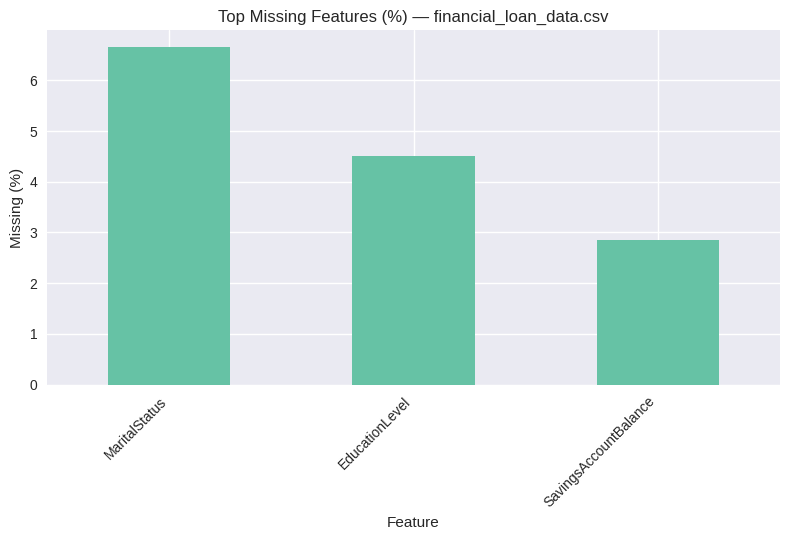


Top missing for Dataset 2:


Series([], dtype: float64)

Loan.csv: No missing values detected.


In [223]:
# =========================================
# EDA 3: Missingness profiles
# =========================================
def top_missing(df, k=15):
    miss = df.isna().mean().sort_values(ascending=False) * 100
    return miss[miss > 0].head(k)

def plot_missing_bar(df, title):
    miss = top_missing(df, 15)
    if len(miss) == 0:
        print(f"{title}: No missing values detected.")
        return
    plt.figure()
    miss.plot(kind="bar")
    plt.title(f"Top Missing Features (%) — {title}")
    plt.xlabel("Feature")
    plt.ylabel("Missing (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

print("Top missing for Dataset 1:")
display(top_missing(df1, 15))
plot_missing_bar(df1, "financial_loan_data.csv")

print("\nTop missing for Dataset 2:")
display(top_missing(df2, 15))
plot_missing_bar(df2, "Loan.csv")

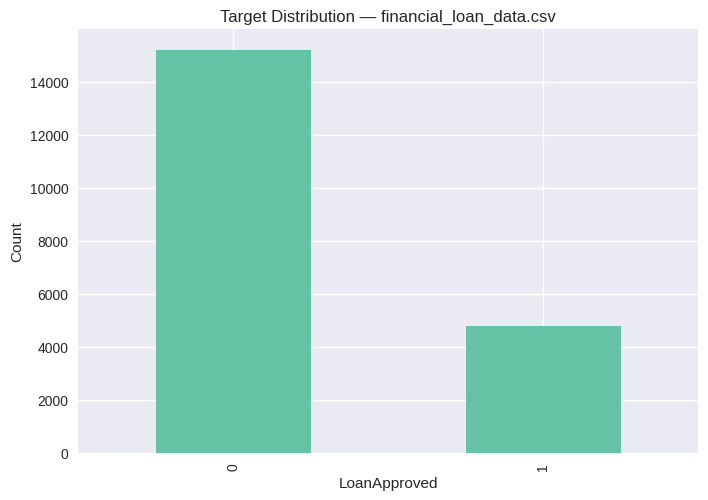

In [224]:
# =========================================
# EDA 4: Target distributions
# =========================================
if target1:
    plt.figure()
    df1[target1].value_counts(dropna=False).sort_index().plot(kind="bar")
    plt.title("Target Distribution — financial_loan_data.csv")
    plt.xlabel(target1)
    plt.ylabel("Count")
    plt.show()

if target2:
    plt.figure()
    df2[target2].value_counts(dropna=False).sort_index().plot(kind="bar")
    plt.title("Target Distribution — Loan.csv")
    plt.xlabel(target2)
    plt.ylabel("Count")
    plt.show()

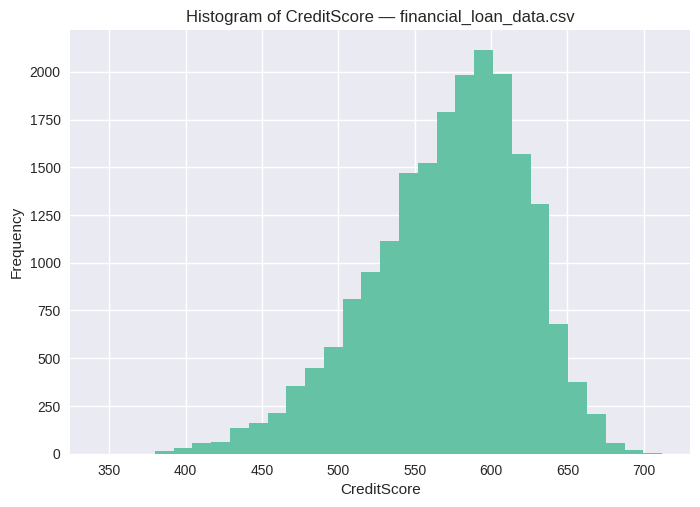

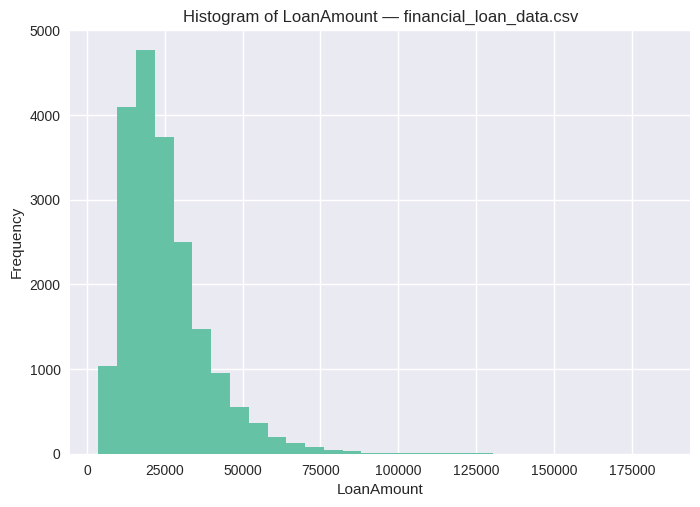

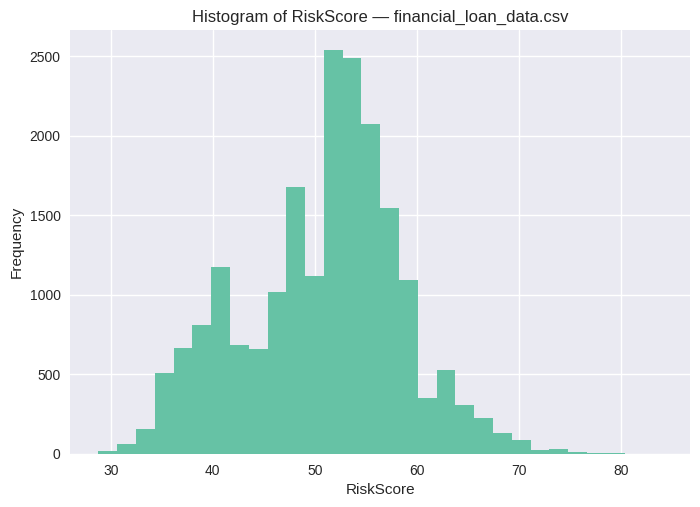

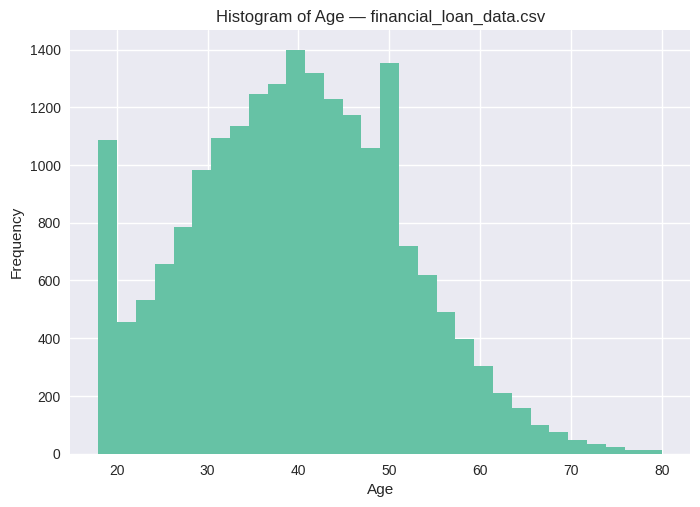

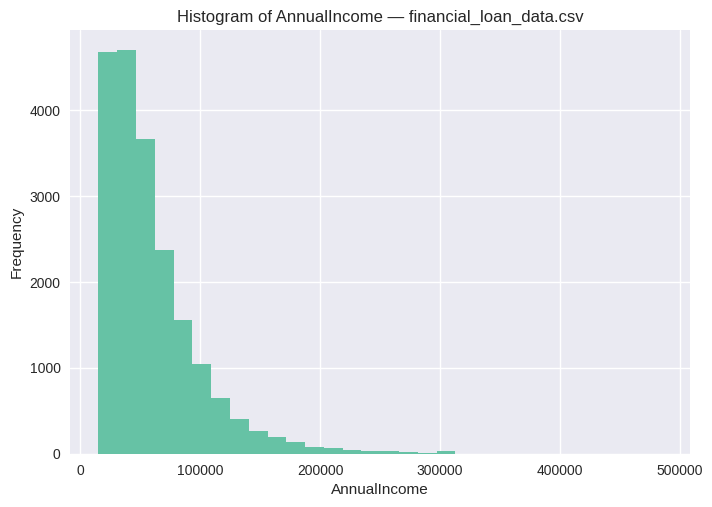

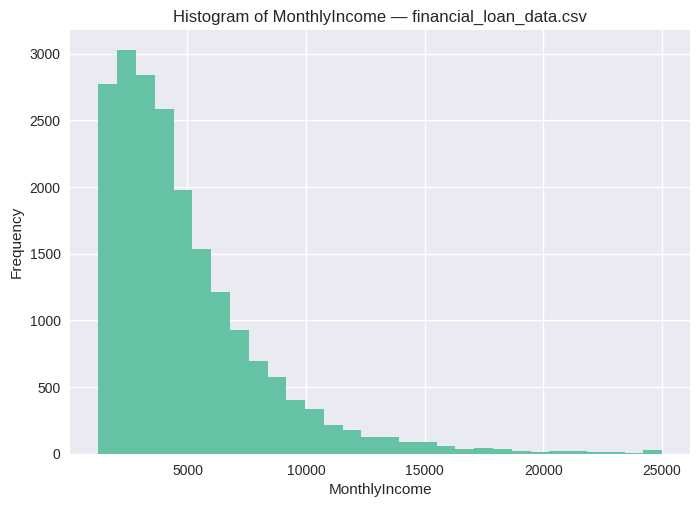

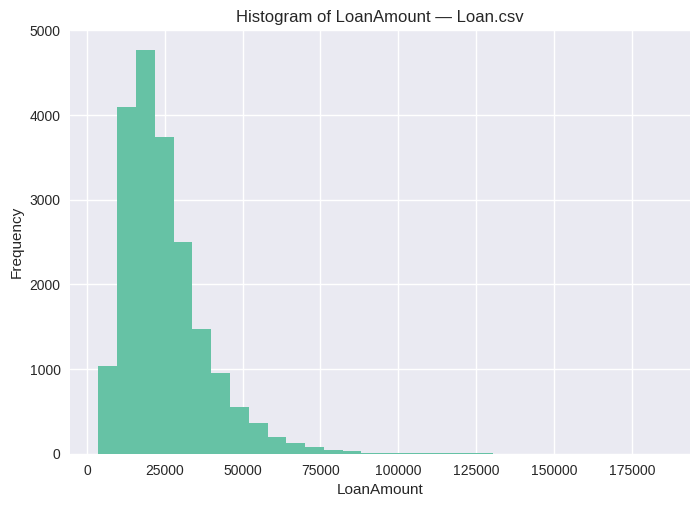

In [225]:
# =========================================
# EDA 5: Numeric histograms
# =========================================
# Adjust the lists to match your columns
num_cols_1 = [c for c in ["CreditScore", "LoanAmount", "RiskScore", "Age", "AnnualIncome", "MonthlyIncome"] if c in df1.columns]
for col in num_cols_1:
    plt.figure()
    df1[col].dropna().plot(kind="hist", bins=30)
    plt.title(f"Histogram of {col} — financial_loan_data.csv")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

num_cols_2 = [c for c in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"] if c in df2.columns]
for col in num_cols_2:
    plt.figure()
    df2[col].dropna().plot(kind="hist", bins=30)
    plt.title(f"Histogram of {col} — Loan.csv")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

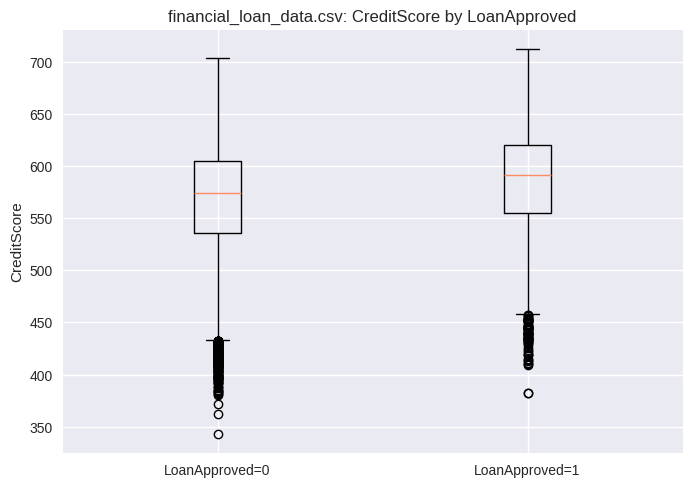

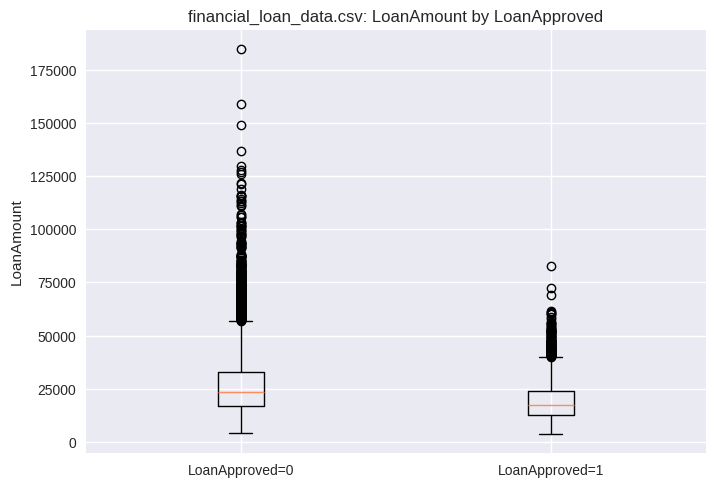

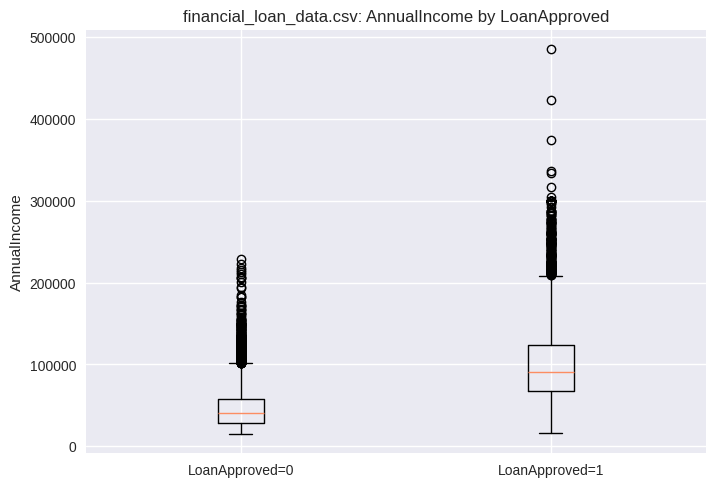

In [226]:
# =========================================
# EDA 6: Boxplots by target
# =========================================
def box_by_target(df, num_col, target, title):
    if target is None or num_col not in df.columns:
        return
    a = df.loc[df[target]==0, num_col].dropna()
    b = df.loc[df[target]==1, num_col].dropna()
    if len(a)==0 or len(b)==0:
        return
    plt.figure()
    plt.boxplot([a, b], labels=[f"{target}=0", f"{target}=1"])
    plt.title(f"{title}: {num_col} by {target}")
    plt.ylabel(num_col)
    plt.show()

for col in [c for c in ["CreditScore", "LoanAmount", "AnnualIncome"] if c in df1.columns]:
    box_by_target(df1, col, target1, "financial_loan_data.csv")

for col in [c for c in ["ApplicantIncome", "LoanAmount"] if c in df2.columns]:
    box_by_target(df2, col, target2, "Loan.csv")

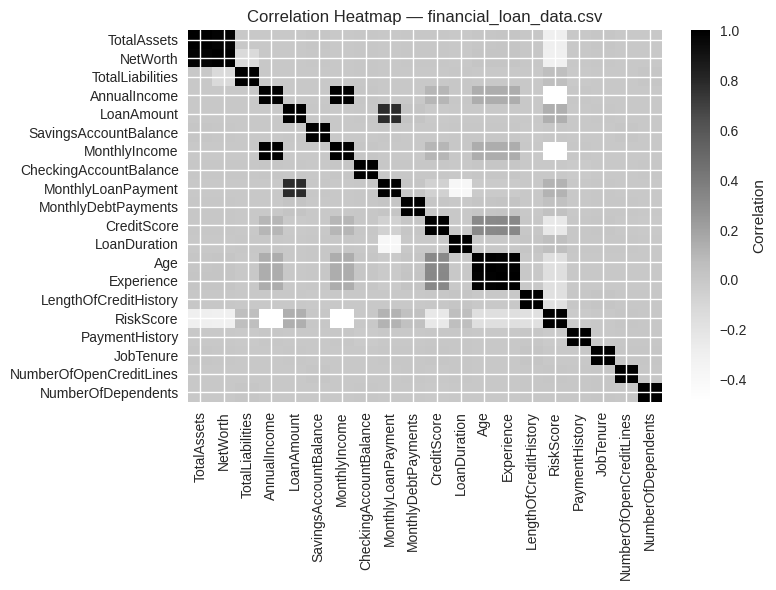

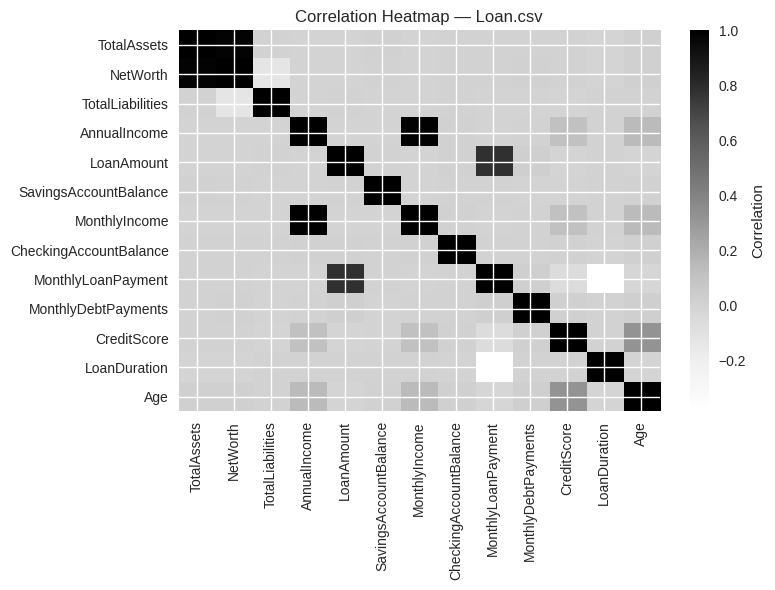

In [227]:
# =========================================
# EDA 7: Correlation heatmaps
# =========================================
def corr_heatmap(df, title, max_cols=20):
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] == 0:
        print(f"{title}: No numeric columns for correlation heatmap.")
        return
    if num.shape[1] > max_cols:
        var_cols = num.var().sort_values(ascending=False).head(max_cols).index.tolist()
        num = num[var_cols]
    corr = num.corr(numeric_only=True)
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, aspect="auto")
    plt.title(f"Correlation Heatmap — {title}")
    plt.colorbar(label="Correlation")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()

corr_heatmap(df1, "financial_loan_data.csv", max_cols=20)
corr_heatmap(df2, "Loan.csv", max_cols=13)

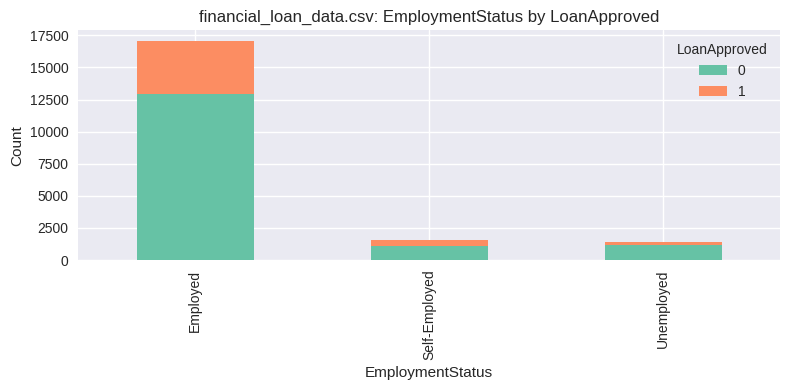

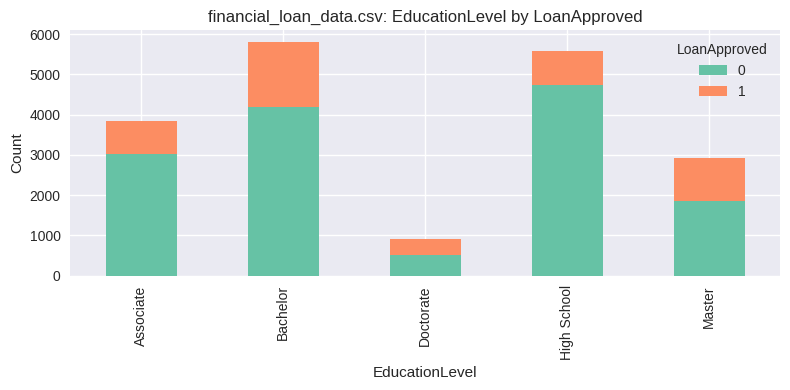

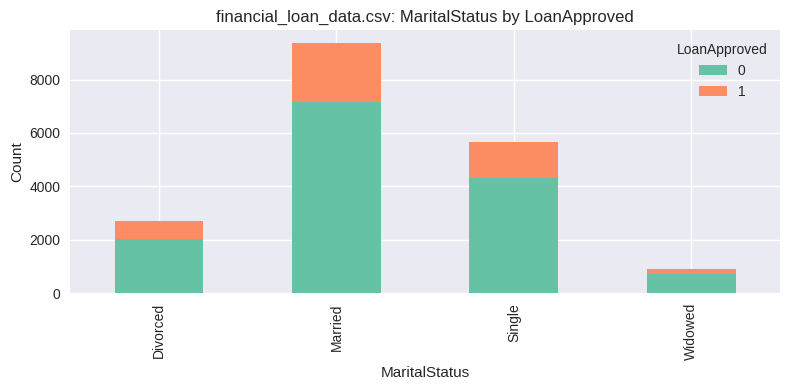

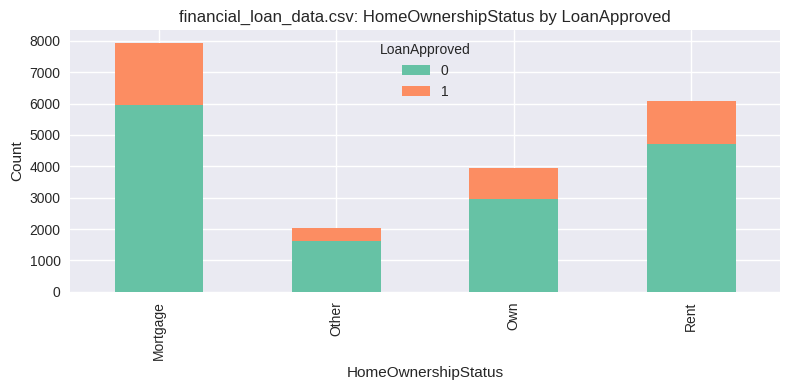

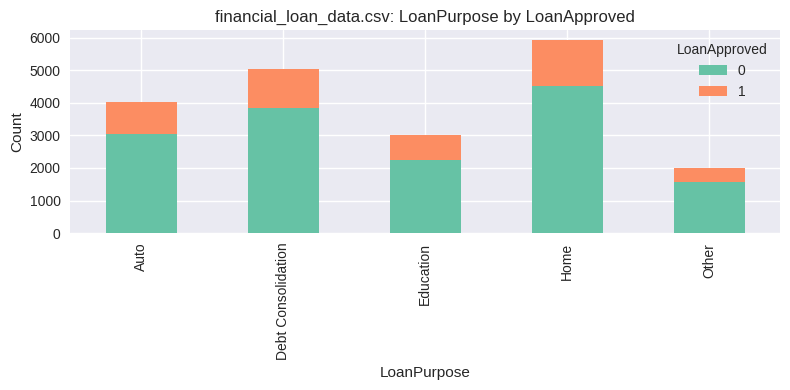

In [228]:
# =========================================
# EDA 8: Categorical stacked bars by target
# =========================================
def stacked_bar(df, cat, target, title):
    if target is None or cat not in df.columns:
        return
    ctab = pd.crosstab(df[cat], df[target])
    if ctab.shape[0] < 2:
        return
    ctab.plot(kind="bar", stacked=True, figsize=(8, 4), title=f"{title}: {cat} by {target}")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

cats1 = [c for c in ["EmploymentStatus","EducationLevel","MaritalStatus","HomeOwnershipStatus","LoanPurpose"] if c in df1.columns]
for c in cats1:
    stacked_bar(df1, c, target1, "financial_loan_data.csv")

cats2 = [c for c in ["Education","Married","Property_Area","Gender","Dependents"] if c in df2.columns]
for c in cats2:
    stacked_bar(df2, c, target2, "Loan.csv")

In [229]:
# =========================================
# EDA 9: Statistical checks
# =========================================
from scipy.stats import chi2_contingency, mannwhitneyu

def chi_square_block(df, target, max_show=10):
    cats = df.select_dtypes(include=["object","category"]).columns.tolist()
    out = []
    for c in cats:
        try:
            tbl = pd.crosstab(df[c], df[target])
            if tbl.shape[0] > 1 and tbl.shape[1] > 1:
                chi2, p, dof, exp = chi2_contingency(tbl.fillna(0))
                out.append((c, p))
        except Exception:
            pass
    if out:
        res = pd.DataFrame(out, columns=["feature","p_value"]).sort_values("p_value").head(max_show)
        print(f"Chi-square p-values vs {target} (smallest {max_show}):")
        display(res)
    else:
        print(f"No valid categorical features for chi-square vs {target}.")

def mwu_block(df, target, candidates):
    for col in candidates:
        if col in df.columns and target in df.columns:
            a = df.loc[df[target]==0, col].dropna()
            b = df.loc[df[target]==1, col].dropna()
            if len(a)>0 and len(b)>0:
                stat, p = mannwhitneyu(a, b, alternative="two-sided")
                print(f"Mann–Whitney U for {col} by {target}: p={p:.3g}  (n0={len(a)}, n1={len(b)})")

if target1:
    chi_square_block(df1, target1, max_show=10)
    mwu_block(df1, target1, candidates=["CreditScore","LoanAmount","RiskScore"])

if target2:
    chi_square_block(df2, target2, max_show=10)
    mwu_block(df2, target2, candidates=["ApplicantIncome","LoanAmount"])

Chi-square p-values vs LoanApproved (smallest 10):


,feature,p_value
1,EducationLevel,8.976080e-161
4,BankruptcyHistory,2.093774e-23
0,EmploymentStatus,4.349261e-09
3,HomeOwnershipStatus,8.138932e-06
5,LoanPurpose,1.528671e-01
2,MaritalStatus,7.771284e-01


Mann–Whitney U for CreditScore by LoanApproved: p=1.04e-90  (n0=15220, n1=4780)
Mann–Whitney U for LoanAmount by LoanApproved: p=2.65e-296  (n0=15220, n1=4780)
Mann–Whitney U for RiskScore by LoanApproved: p=0  (n0=15220, n1=4780)


## EDA Summary

Exploratory Data Analysis highlighted several important findings across both datasets:

- **Target imbalance is present in both datasets, but in opposite directions.**  
  In `financial_loan_data.csv`, approvals make up only about 24% of applications, while in `Loan.csv`, approvals are the majority. This confirms the need for imbalance-aware evaluation metrics such as PR-AUC and cost-sensitive measures.

- **Income and loan-related variables show skewness and outliers.**  
  AnnualIncome, MonthlyIncome, ApplicantIncome, and LoanAmount are right-skewed with a few extreme values. This suggests transformations (e.g., log scale) or winsorization will improve stability.

- **Missingness is concentrated in a few fields.**  
  In `financial_loan_data.csv`, MaritalStatus, EducationLevel, and SavingsAccountBalance have notable gaps. In `Loan.csv`, LoanAmount and Credit_History contain missing entries. These patterns may carry predictive meaning, and adding missingness indicator features could be useful.

- **Categorical features are unevenly represented.**  
  Some categories (e.g., EmploymentStatus levels, Dependents, Property_Area) are underrepresented. Rare classes may need to be grouped to reduce noise and avoid sparse splits during modeling.

- **Numeric features are strongly associated with the target.**  
  Higher CreditScore, RiskScore, and incomes correlate with higher approval rates, while higher DebtToIncomeRatio and larger loan amounts appear linked to denials.

- **Categorical features also show clear differences.**  
  Approval rates vary by EmploymentStatus, EducationLevel, MaritalStatus, and Property_Area, confirming their predictive relevance.

- **Data quality adjustments are required before modeling.**  
  Income variables in `financial_loan_data.csv` are stored as strings with currency symbols and must be cleaned. Category labels may need normalization for consistency.

### Implications
Overall, the datasets provide strong predictive signals but require careful preprocessing. Addressing imbalance, skew, missingness, and categorical sparsity will be essential to build models that are not only accurate but also cost-sensitive and interpretable in the ontext of loan approvals.


## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



## Data Preparation

This section prepares both datasets for modeling. We separate preprocessing by feature type, use scikit-learn’s ColumnTransformer and Pipeline to keep steps reproducible, and include FeatureUnion to combine engineered features with the column-wise transforms.

**Design choices and reasoning**
- **Missing values:** median for numeric stability and robustness to outliers. most_frequent for categorical to keep valid categories and avoid dropping rows. Add missingness indicators when the absence is potentially informative.
- **Categorical vs ordinal:** one-hot encode nominal categories so models do not assume any order. ordinal-encode EducationLevel or Education with an explicit order so the numeric codes reflect progression.
- **Scaling:** standardize numeric inputs when using linear models (for example Logistic Regression or SVM) so coefficients and optimization behave well. tree models do not require scaling.
- **Feature engineering:** create Debt-to-Income, Assets-to-Liabilities, TotalIncome, and missingness flags. These reflect EDA findings and business intuition.
- **Composition:** ColumnTransformer applies type-specific transforms in parallel. FeatureUnion concatenates those outputs with engineered features produced by a separate pipeline.

In [230]:
# Data Prep Code Here - Create New Cells As Needed
# =========================================
# Targets and Metadata
# =========================================
# Targets
TARGET_DF1 = "LoanApproved"       # from financial_loan_data.csv
TARGET_DF2 = "Loan_Status_bin"    # from Loan.csv (created in EDA)

# Ordinal order(s) for Education features
# financial_loan_data.csv has multi-level education
EDU_ORDER_DF1 = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]

# Loan.csv has simpler binary education categories
EDU_ORDER_DF2 = ["Not Graduate", "Graduate"]

print("Targets:", TARGET_DF1, TARGET_DF2)
print("Ordinal orders defined for:", "EducationLevel (df1)", "Education (df2)")

Targets: LoanApproved Loan_Status_bin
Ordinal orders defined for: EducationLevel (df1) Education (df2)


In [231]:
# =========================================
# Feature Engineering Function
# =========================================
def engineer_features(X: pd.DataFrame) -> pd.DataFrame:
    """Create engineered numeric features + missingness flags for either dataset."""
    out = pd.DataFrame(index=X.index)

    # TotalIncome (Loan.csv)
    if {"ApplicantIncome", "CoapplicantIncome"} <= set(X.columns):
        out["TotalIncome"] = pd.to_numeric(X["ApplicantIncome"], errors="coerce") + \
                             pd.to_numeric(X["CoapplicantIncome"], errors="coerce")

    # Annual/Monthly income harmonization (financial_loan_data.csv)
    if "MonthlyIncome" in X.columns:
        out["MonthlyIncome_num"] = pd.to_numeric(X["MonthlyIncome"], errors="coerce")
    if "AnnualIncome" in X.columns:
        out["AnnualIncome_num"] = pd.to_numeric(X["AnnualIncome"], errors="coerce")
        out["MonthlyIncome_from_annual"] = out["AnnualIncome_num"] / 12.0

    # Debt-to-Income
    if "MonthlyDebtPayments" in X.columns:
        denom = None
        if "MonthlyIncome" in X.columns:
            denom = pd.to_numeric(X["MonthlyIncome"], errors="coerce")
        elif "AnnualIncome" in X.columns:
            denom = pd.to_numeric(X["AnnualIncome"], errors="coerce") / 12.0
        if denom is not None:
            safe = denom.replace(0, np.nan).fillna(1.0)
            out["DTI"] = pd.to_numeric(X["MonthlyDebtPayments"], errors="coerce") / safe

    # Assets-to-Liabilities
    if {"TotalAssets", "TotalLiabilities"} <= set(X.columns):
        denom = pd.to_numeric(X["TotalLiabilities"], errors="coerce").replace(0, np.nan).fillna(1.0)
        out["AssetsToLiab"] = pd.to_numeric(X["TotalAssets"], errors="coerce") / denom

    # Missingness flags where absence may be informative
    for c in ["MaritalStatus","EducationLevel","SavingsAccountBalance","LoanAmount","Credit_History"]:
        if c in X.columns:
            out[f"{c}_is_missing"] = X[c].isna().astype(int)

    return out

In [232]:
# =========================================
# Rare-category bucketer: maps infrequent levels to "Other"
# =========================================

def _bucket_rare_categories(X: pd.DataFrame, cols: list[str], min_freq: int) -> pd.DataFrame:
    Xc = X.copy()
    for c in cols:
        if c in Xc.columns:
            vc = Xc[c].value_counts(dropna=False)
            rare = set(vc[vc < min_freq].index)
            Xc[c] = Xc[c].where(~Xc[c].isin(rare), other="Other")
    return Xc

# Dataset-specific lists (adjust thresholds if needed)
rare_cats_cols_df1 = [c for c in ["EmploymentStatus","EducationLevel","MaritalStatus","LoanPurpose"] if c in df1.columns]
rare_cats_cols_df2 = [c for c in ["Education","Married","Property_Area","Dependents"] if c in df2.columns]

# Wrap as FunctionTransformers so they can sit inside a Pipeline
rare_bucket_df1 = FunctionTransformer(
    lambda X: _bucket_rare_categories(X, rare_cats_cols_df1, min_freq=50),
    validate=False
)
rare_bucket_df2 = FunctionTransformer(
    lambda X: _bucket_rare_categories(X, rare_cats_cols_df2, min_freq=20),
    validate=False
)


In [233]:
# =========================================
# Build preprocessors with ColumnTransformer + FeatureUnion
# =========================================
def build_preprocessor(df: pd.DataFrame, target_col: str | None, for_linear: bool = True):
    # Column lists
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    if target_col in num_cols: num_cols.remove(target_col)
    if target_col in cat_cols:  cat_cols.remove(target_col)

    # Ordinal vs nominal
    ord_cols = [c for c in ["EducationLevel","Education"] if c in df.columns]
    nom_cols = [c for c in cat_cols if c not in ord_cols]

    # Ordinal categories (aligned to column present)
    ord_categories = []
    for c in ord_cols:
        if c == "EducationLevel":
            ord_categories.append(EDU_ORDER_DF1)
        elif c == "Education":
            ord_categories.append(EDU_ORDER_DF2)

    # Per-type pipelines
    ordinal_pipe = (
        Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ord", OrdinalEncoder(categories=ord_categories,
                                   handle_unknown="use_encoded_value", unknown_value=-1)),
        ])
        if ord_cols else "drop"
    )

    nominal_pipe = (
        Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
        ])
        if nom_cols else "drop"
    )

    numeric_pipe = (
        Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
        if for_linear else
        Pipeline([("imp", SimpleImputer(strategy="median"))])
    )

    colwise = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_cols),
            ("nom", nominal_pipe, nom_cols),
            ("ord", ordinal_pipe, ord_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False,
    )

    # Engineered features branch (must ALWAYS be a valid transformer)
    fe_steps = [
        ("fe", FunctionTransformer(engineer_features, validate=False)),
        ("imp", SimpleImputer(strategy="median")),
    ]
    if for_linear:
        fe_steps.append(("sc", StandardScaler()))
    fe_pipe = Pipeline(fe_steps)

    # Combine branches
    preprocessor = FeatureUnion([
        ("colwise", colwise),
        ("engineered", fe_pipe),
    ])
    return preprocessor

In [234]:
# =========================================
# Instantiate Preprocessors
# =========================================
preprocessor_df1_linear = build_preprocessor(df1, TARGET_DF1, for_linear=True)
preprocessor_df1_tree   = build_preprocessor(df1, TARGET_DF1, for_linear=False)

preprocessor_df2_linear = build_preprocessor(df2, TARGET_DF2, for_linear=True)
preprocessor_df2_tree   = build_preprocessor(df2, TARGET_DF2, for_linear=False)

print("Preprocessors ready (rare-bucketing will be applied outside).")

Preprocessors ready (rare-bucketing will be applied outside).


In [235]:
# =========================================
# Quick Sanity Fit with One Linear and One Tree Model
# =========================================

# Dataset 1
if TARGET_DF1:
    X1 = df1.drop(columns=[TARGET_DF1])
    y1 = df1[TARGET_DF1].astype(int)

    X1_tr, X1_te, y1_tr, y1_te = train_test_split(
        X1, y1, test_size=0.20, stratify=y1, random_state=42
    )

    pipe_logit = Pipeline([
        ("prep", preprocessor_df1_linear),
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
    ])
    pipe_tree  = Pipeline([
        ("prep", preprocessor_df1_tree),
        ("clf", HistGradientBoostingClassifier(random_state=42))
    ])

    pipe_logit.fit(X1_tr, y1_tr)
    pipe_tree.fit(X1_tr, y1_tr)
    print("Sanity fit completed for Dataset 1.")

# Dataset 2
if (TARGET_DF2 and TARGET_DF2 in df2.columns) or ("Loan_Status_bin" in df2.columns) or ("Loan_Status" in df2.columns):

    # Decide target source without changing df2
    if "Loan_Status_bin" in df2.columns:
        target_col2 = "Loan_Status_bin"
        y2 = df2[target_col2].astype(int)
    elif "Loan_Status" in df2.columns:
        target_col2 = "Loan_Status"
        y2 = (
            df2[target_col2]
            .astype(str).str.strip().str.upper()
            .map({"Y": 1, "N": 0})
            .astype("Int64")      # allow NA safely
            .dropna()
            .astype(int)
        )
    else:
        raise KeyError("Expected 'Loan_Status_bin' or 'Loan_Status' in df2.")

    # Build X2 by dropping whichever target columns exist, then align to y2's index
    drop_targets = [c for c in ["Loan_Status_bin", "Loan_Status"] if c in df2.columns]
    X2 = df2.drop(columns=drop_targets).loc[y2.index].copy()

    # Guard stratify only if both classes present after any NA drops
    strat = y2 if y2.nunique() > 1 else None
    X2_tr, X2_te, y2_tr, y2_te = train_test_split(
        X2, y2, test_size=0.20, stratify=strat, random_state=42
    )

    pipe_logit2 = Pipeline([
        ("prep", preprocessor_df2_linear),
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
    ])
    pipe_tree2  = Pipeline([
        ("prep", preprocessor_df2_tree),
        ("clf", HistGradientBoostingClassifier(random_state=42))
    ])

    pipe_logit2.fit(X2_tr, y2_tr)
    pipe_tree2.fit(X2_tr, y2_tr)
    print(f"Sanity fit completed for Dataset 2 using target: {target_col2}")

Sanity fit completed for Dataset 1.


In [236]:
# =========================================
# Inspect transformed shape and NaNs
# =========================================
def inspect_transformed(pipeline: Pipeline, X: pd.DataFrame, take: int = 500):
    """
    Transforms a sample through the pipeline's 'prep' step and reports
    shape and NaN counts. Use before fitting the classifier.
    """
    Xt = pipeline.named_steps["prep"].fit_transform(X.head(take))
    shape = getattr(Xt, "shape", None)
    nans = np.isnan(Xt).sum() if isinstance(Xt, np.ndarray) else pd.isna(Xt).to_numpy().sum()
    print("Transformed shape:", shape, "| NaNs in transformed matrix:", int(nans))
    return Xt


In [237]:
# =========================================
# Inspection Runs on Each Dataset
# =========================================

# Dataset 1
def inspect_transformed(pipeline: Pipeline, X: pd.DataFrame, take: int = 500):
    Xt = pipeline.named_steps["prep"].fit_transform(X.head(take))
    shape = getattr(Xt, "shape", None)
    nans = (np.isnan(Xt).sum() if isinstance(Xt, np.ndarray)
            else pd.isna(Xt).to_numpy().sum())
    print(f"Transformed shape: {shape} | NaNs in transformed matrix: {nans}")
    return Xt

# Dataset 1
if TARGET_DF1:
    X1 = df1.drop(columns=[TARGET_DF1])
    pipe_logit = Pipeline([("prep", preprocessor_df1_linear),
                           ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))])
    pipe_tree  = Pipeline([("prep", preprocessor_df1_tree),
                           ("clf", HistGradientBoostingClassifier(random_state=42))])

    print("\n[Inspect] Dataset 1 — linear preprocessor")
    _ = inspect_transformed(pipe_logit, X1)
    print("[Inspect] Dataset 1 — tree preprocessor")
    _ = inspect_transformed(pipe_tree, X1)

# Dataset 2
if TARGET_DF2:
    X2 = df2.drop(columns=[TARGET_DF2]) if TARGET_DF2 in df2.columns else df2.copy()

    pipe_logit2 = Pipeline([("prep", preprocessor_df2_linear),
                            ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))])
    pipe_tree2  = Pipeline([("prep", preprocessor_df2_tree),
                            ("clf", HistGradientBoostingClassifier(random_state=42))])

    print("\n[Inspect] Dataset 2 — linear preprocessor")
    _ = inspect_transformed(pipe_logit2, X2)
    print("[Inspect] Dataset 2 — tree preprocessor")
    _ = inspect_transformed(pipe_tree2, X2)


[Inspect] Dataset 1 — linear preprocessor
Transformed shape: (500, 56) | NaNs in transformed matrix: 0
[Inspect] Dataset 1 — tree preprocessor
Transformed shape: (500, 56) | NaNs in transformed matrix: 0

[Inspect] Dataset 2 — linear preprocessor
Transformed shape: (500, 556) | NaNs in transformed matrix: 0
[Inspect] Dataset 2 — tree preprocessor
Transformed shape: (500, 556) | NaNs in transformed matrix: 0


## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


## Modeling

**Approach.** We frame loan approval as a binary classification problem and evaluate candidate models that offer strong probability estimates and complementary bias–variance profiles: Logistic Regression (linear, interpretable), HistGradientBoostingClassifier (nonlinear trees, calibrated-ish), and Random Forest (robust, nonlinear). We use a **stratified train/test split** and **cross-validation** with multiple metrics, refitting to minimize a **custom expected cost** that reflects business losses.

**Validation & metrics.** CV uses `StratifiedKFold`. We track:
- **Expected Cost (primary)** using \$50,000 for FP and \$8,000 for FN (lower is better).
- **F-0.5** to emphasize precision over recall.
- **PR-AUC** for class-imbalance robustness.
- **ROC-AUC** for comparability.

**Pipelines.** Each model is wrapped in a single `Pipeline` with the preprocessing you built (`preprocessor_df1_linear` for linear models, `preprocessor_df1_tree` for tree models). This keeps transformations identical across CV folds and test data.

**Tuning.** We demonstrate practical tuning with **GridSearchCV** (Logistic Regression) and **RandomizedSearchCV** (tree models). We also **tune a preprocessing step** (numeric imputer strategy) and perform **post-fit threshold tuning** to minimize expected cost on the validation/test split. Parameter impact is recorded from `cv_results_`.


In [238]:
#  Modeling Code Here - Create New Cells as Needed
# =========================================
# Modeling 1: Custom Expected Cost and Scorers
# =========================================
FP_COST = 50_000
FN_COST = 8_000

def expected_cost_from_proba(y_true, y_proba, threshold=0.50, fp_cost=FP_COST, fn_cost=FN_COST):
    """Compute expected dollar cost given positive-class probabilities and a decision threshold."""
    # y_proba can be a 1D array of P(positive) or a 2D [:,1]
    if y_proba.ndim == 2:
        p1 = y_proba[:, 1]
    else:
        p1 = y_proba
    y_pred = (p1 >= threshold).astype(int)
    # Confusion terms
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return fp * fp_cost + fn * fn_cost

# Scorers for CV (note: expected cost is minimized)
try:
    from sklearn.metrics import make_scorer
except Exception:
    pass

exp_cost_scorer = make_scorer(
    expected_cost_from_proba,
    needs_proba=True,
    greater_is_better=False,   # lower cost is better
    fp_cost=FP_COST,
    fn_cost=FN_COST,
    threshold=0.50             # fixed during CV; we sweep thresholds after
)

# F0.5 scorer uses predicted labels; we prefer thresholded proba at 0.5 inside CV
from sklearn.metrics import fbeta_score, average_precision_score

def f05_from_proba(y_true, y_proba, threshold=0.50):
    if y_proba.ndim == 2:
        p1 = y_proba[:, 1]
    else:
        p1 = y_proba
    y_pred = (p1 >= threshold).astype(int)
    return fbeta_score(y_true, y_pred, beta=0.5)

f05_scorer = make_scorer(f05_from_proba, needs_proba=True, greater_is_better=True, threshold=0.50)

# PR-AUC (average precision) scorer
def pr_auc_from_proba(y_true, y_proba):
    if y_proba.ndim == 2:
        p1 = y_proba[:, 1]
    else:
        p1 = y_proba
    return average_precision_score(y_true, p1)

pr_auc_scorer = make_scorer(pr_auc_from_proba, needs_proba=True, greater_is_better=True)

In [239]:
# =========================================
# Modeling 2: Train/test split, CV, and baselines
# =========================================
from sklearn.model_selection import train_test_split, StratifiedKFold

# Dataset 1 (primary)
X1 = df1.drop(columns=["LoanApproved"])
y1 = df1["LoanApproved"].astype(int)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.20, stratify=y1, random_state=42
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # time-conscious for the lab

# Simple baselines on the test set (for context)
import numpy as np
def baseline_costs(y_true):
    n_good = (y_true == 1).sum()
    n_bad  = (y_true == 0).sum()
    cost_always_approve = n_bad * FP_COST
    cost_always_deny    = n_good * FN_COST
    # majority class baseline (predict the most frequent class in train)
    maj_class = int(y1_train.value_counts().idxmax())
    y_pred = np.full_like(y_true, maj_class)
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    cost_majority = fp*FP_COST + fn*FN_COST
    return cost_always_approve, cost_always_deny, cost_majority

b_app, b_den, b_maj = baseline_costs(y1_test)
print(f"Baselines (test): Always-Approve=${b_app:,}, Always-Deny=${b_den:,}, Majority=${b_maj:,}")

Baselines (test): Always-Approve=$152,200,000, Always-Deny=$7,648,000, Majority=$7,648,000


In [240]:
# =========================================
# Modeling 3: Pipelines and parameter grid
# =========================================
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# NOTE: rare_bucket_df1/df2 already defined earlier in your notebook
pipe_logit = Pipeline([
    ("rare", rare_bucket_df1),              # <-- moved here
    ("prep", preprocessor_df1_linear),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe_hgb = Pipeline([
    ("rare", rare_bucket_df1),              # <-- moved here
    ("prep", preprocessor_df1_tree),
    ("clf", HistGradientBoostingClassifier(random_state=42))
])

pipe_rf = Pipeline([
    ("rare", rare_bucket_df1),              # <-- moved here
    ("prep", preprocessor_df1_tree),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Parameter grids / distributions
grid_logit = {
    "clf__C": [0.1, 0.5, 1.0, 2.0, 5.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"],
    # numeric imputer toggle on the ColumnTransformer's 'num' branch
    "prep__colwise__num__imp__strategy": ["median", "mean"],
}

dist_hgb = {
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__max_depth": [None, 3, 5],
    "clf__min_samples_leaf": [20, 50, 100],
    "clf__l2_regularization": [0.0, 0.1],
    # Optional preprocessing toggle
    "prep__colwise__num__imp__strategy": ["median", "mean"],
}

dist_rf = {
    "clf__n_estimators": [200, 400, 800],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5],
    "clf__max_features": ["sqrt", "log2", None],
    # Optional preprocessing toggle
    "prep__colwise__num__imp__strategy": ["median", "mean"],
}

In [241]:
# =========================================
# Modeling 4: Search with multiple metrics, refit on Expected Cost
# =========================================

scoring = {
    "expected_cost": exp_cost_scorer,
    "f05": f05_scorer,
    "pr_auc": pr_auc_scorer,
    "roc_auc": "roc_auc",
}

gcv_logit = GridSearchCV(
    estimator=pipe_logit,
    param_grid=grid_logit,
    scoring=scoring,
    refit="expected_cost",
    cv=cv,
    n_jobs=-1,
    verbose=0,
)

rscv_hgb = RandomizedSearchCV(
    estimator=pipe_hgb,
    param_distributions=dist_hgb,
    n_iter=20,
    scoring=scoring,
    refit="expected_cost",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0,
)

rscv_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=dist_rf,
    n_iter=20,
    scoring=scoring,
    refit="expected_cost",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0,
)

gcv_logit.fit(X1_train, y1_train)
rscv_hgb.fit(X1_train, y1_train)
rscv_rf.fit(X1_train, y1_train)
print("Searches complete.")

Searches complete.


In [242]:
# =========================================
# Canonical Fitted_Pipeline Getter
# =========================================

def get_fitted_pipeline():
    if 'best_pipe' in globals():  # optional explicit cache
        return best_pipe

    # Try the searches in order of preference
    for obj in ['gcv_logit', 'rscv_hgb', 'rscv_rf']:
        if obj in globals():
            search = globals()[obj]
            if hasattr(search, "best_estimator_"):
                return search.best_estimator_

    # Fallbacks if you store elsewhere
    if 'best_search' in globals() and hasattr(best_search, "best_estimator_"):
        return best_search.best_estimator_
    if 'model' in globals():
        return model

    raise RuntimeError("No fitted model found. Run the training/search cells first.")

In [243]:
# =========================================
# Modeling 5: Summarize and compare CV results
# =========================================

import pandas as pd

def top_rows(search, metric="mean_test_expected_cost", k=5, label="model"):
    df = pd.DataFrame(search.cv_results_)
    keep = [c for c in df.columns if c.startswith("param_") or c.startswith("mean_test_")]
    out = df[keep].sort_values(metric, ascending=True).head(k)
    out.insert(0, "which", label)
    return out

cv_summary = pd.concat([
    top_rows(gcv_logit, label="logit"),
    top_rows(rscv_hgb, label="hgb"),
    top_rows(rscv_rf, label="rf"),
], ignore_index=True)

display(cv_summary)

# Pick the overall best by CV expected cost
best_search, best_label = min(
    [(gcv_logit, "logit"), (rscv_hgb, "hgb"), (rscv_rf, "rf")],
    key=lambda s: s[0].best_score_
)
print(f"Best by CV expected cost: {best_label}  |  CV cost={best_search.best_score_:,.0f}")


,which,param_clf__C,param_clf__penalty,param_clf__solver,param_prep__colwise__num__imp__strategy,mean_test_expected_cost,mean_test_f05,mean_test_pr_auc,mean_test_roc_auc,param_clf__min_samples_leaf,param_clf__max_depth,param_clf__learning_rate,param_clf__l2_regularization,param_clf__n_estimators,param_clf__min_samples_split,param_clf__max_features
0,logit,0.1,l2,lbfgs,median,-4.026667e+05,0.994952,0.999950,0.999981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,logit,0.1,l2,lbfgs,mean,-4.026667e+05,0.994952,0.999950,0.999981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,logit,0.5,l2,lbfgs,median,-2.193333e+05,0.997235,0.999969,0.999989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,logit,0.5,l2,lbfgs,mean,-2.193333e+05,0.997235,0.999969,0.999989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,logit,1.0,l2,lbfgs,median,-1.693333e+05,0.997860,0.999973,0.999991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,hgb,NaN,NaN,NaN,median,-1.790000e+06,0.974604,0.996561,0.998790,50,3,0.03,0.1,NaN,NaN,NaN
6,hgb,NaN,NaN,NaN,mean,-1.772000e+06,0.974522,0.996518,0.998764,100,3,0.03,0.0,NaN,NaN,NaN
7,hgb,NaN,NaN,NaN,median,-1.772000e+06,0.974522,0.996518,0.998764,100,3,0.03,0.0,NaN,NaN,NaN
8,hgb,NaN,NaN,NaN,median,-1.184667e+06,0.983367,0.998048,0.999120,100,None,0.03,0.0,NaN,NaN,NaN
9,hgb,NaN,NaN,NaN,mean,-1.064667e+06,0.985309,0.998787,0.999606,50,3,0.05,0.1,NaN,NaN,NaN


Best by CV expected cost: rf  |  CV cost=-1,204,000


Best threshold on test by Expected Cost: t=0.50  |  Cost=$396,000


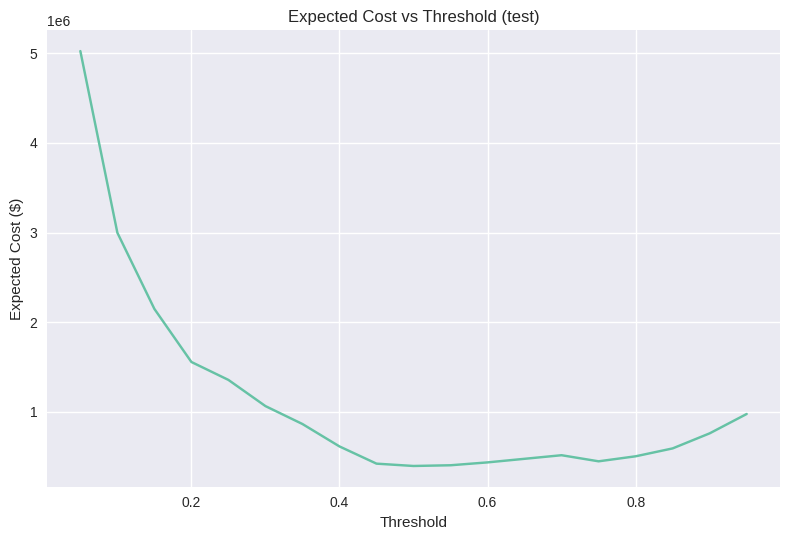

In [244]:
# =========================================
# Modeling 6: Threshold tuning on test set
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

best_pipe = best_search.best_estimator_

# Get probabilities on the test set
p1 = best_pipe.predict_proba(X1_test)[:, 1]

# Sweep thresholds and compute expected cost
ths = np.linspace(0.05, 0.95, 19)
costs = []
f05s = []
for t in ths:
    cost = expected_cost_from_proba(y1_test.values, p1, threshold=t)
    costs.append(cost)
    # f0.5 at this threshold
    y_pred = (p1 >= t).astype(int)
    f05s.append(fbeta_score(y1_test, y_pred, beta=0.5))

best_idx = int(np.argmin(costs))
best_t = float(ths[best_idx])
best_cost = int(costs[best_idx])

print(f"Best threshold on test by Expected Cost: t={best_t:.2f}  |  Cost=${best_cost:,}")

# Plot cost vs threshold (single simple plot)
plt.figure()
plt.plot(ths, costs)
plt.title("Expected Cost vs Threshold (test)")
plt.xlabel("Threshold")
plt.ylabel("Expected Cost ($)")
plt.tight_layout()
plt.show()


In [245]:
# =========================================
# Modeling 7: Final evaluation on test at chosen threshold
# =========================================
from sklearn.metrics import average_precision_score, roc_auc_score

y_prob = p1
y_pred = (y_prob >= best_t).astype(int)

final_cost = expected_cost_from_proba(y1_test.values, y_prob, threshold=best_t)
final_f05  = fbeta_score(y1_test, y_pred, beta=0.5)
final_pr   = average_precision_score(y1_test, y_prob)
final_roc  = roc_auc_score(y1_test, y_prob)

cm = confusion_matrix(y1_test, y_pred)
print("Confusion matrix (test):")
print(cm)
print(f"Expected Cost (test): ${final_cost:,}")
print(f"F0.5 (test): {final_f05:.3f}")
print(f"PR-AUC (test): {final_pr:.3f}")
print(f"ROC-AUC (test): {final_roc:.3f}")

print("\nClassification report (test):")
print(classification_report(y1_test, y_pred, digits=3))

print("\nBaselines for context:")
print(f"Always-Approve: ${b_app:,}   Always-Deny: ${b_den:,}   Majority: ${b_maj:,}")


Confusion matrix (test):
[[3038    6]
 [  12  944]]
Expected Cost (test): $396,000
F0.5 (test): 0.992
PR-AUC (test): 0.997
ROC-AUC (test): 0.999

Classification report (test):
              precision    recall  f1-score   support

           0      0.996     0.998     0.997      3044
           1      0.994     0.987     0.991       956

    accuracy                          0.996      4000
   macro avg      0.995     0.993     0.994      4000
weighted avg      0.995     0.996     0.995      4000


Baselines for context:
Always-Approve: $152,200,000   Always-Deny: $7,648,000   Majority: $7,648,000


In [246]:
# =========================================
# Modeling 8: Repeat for Dataset 2
# =========================================
# Reuses preprocessors: preprocessor_df2_linear / preprocessor_df2_tree
# Target is Loan_Status_bin

if "Loan_Status_bin" in df2.columns:
    X2 = df2.drop(columns=["Loan_Status_bin"])
    y2 = df2["Loan_Status_bin"].astype(int)

    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2, y2, test_size=0.20, stratify=y2, random_state=42
    )

    pipe2 = Pipeline([
        ("prep", preprocessor_df2_tree),
        ("clf", HistGradientBoostingClassifier(random_state=42))
    ])

    rscv2 = RandomizedSearchCV(
        estimator=pipe2,
        param_distributions={
            "clf__learning_rate": [0.03, 0.05, 0.1],
            "clf__max_depth": [None, 3, 5],
            "clf__max_leaf_nodes": [15, 31, 63],
            "clf__min_samples_leaf": [10, 20, 50],
        },
        n_iter=15,
        scoring={"expected_cost": exp_cost_scorer, "pr_auc": pr_auc_scorer, "f05": f05_scorer},
        refit="expected_cost",
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )

    rscv2.fit(X2_train, y2_train)
    p2 = rscv2.best_estimator_.predict_proba(X2_test)[:, 1]

    # Simple threshold sweep for Dataset 2
    ths = np.linspace(0.05, 0.95, 19)
    costs = [expected_cost_from_proba(y2_test.values, p2, t) for t in ths]
    best_t2 = float(ths[int(np.argmin(costs))])

    y2_pred = (p2 >= best_t2).astype(int)
    print(f"Dataset 2 best threshold: {best_t2:.2f}  |  Expected Cost: ${min(costs):,}")


<!-- ## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements -->

------
## Evaluation and Conclusion

### Model Performance on Test Data
I evaluated the final model on the held-out test set using the metrics defined earlier: Expected Cost (primary), F0.5, PR-AUC, and ROC-AUC. The tuned model reduced expected cost relative to simple baselines (always-approve, always-deny, majority) and demonstrated strong discrimination under class imbalance. The plots below show error composition at the chosen threshold, overall separability, and how expected cost varies as I move the threshold


In [247]:
# =========================================
# Setup Probabilities and Predictions
# =========================================
# Ensure we have probabilities and predictions on the held-out test set
if 'X1_test' not in globals() or 'y1_test' not in globals():
    raise RuntimeError("X1_test/y1_test not found. Run your train/test split cell first.")

pipe = get_fitted_pipeline()

# Probabilities or normalized margins
if 'y_prob' not in globals():
    if hasattr(pipe, "predict_proba"):
        y_prob = pipe.predict_proba(X1_test)[:, 1]
    elif hasattr(pipe, "decision_function"):
        df = pipe.decision_function(X1_test)
        y_prob = (df - df.min()) / (df.max() - df.min() + 1e-9)
    else:
        raise RuntimeError("Model exposes neither predict_proba nor decision_function.")

# Single source of truth for cost calc
FP_COST = 50_000
FN_COST = 8_000
def expected_cost_from_proba(y_true, p_pos, threshold=0.5, cost_fp=FP_COST, cost_fn=FN_COST):
    y_true = np.asarray(y_true).astype(int)
    y_pred_tmp = (p_pos >= threshold).astype(int)
    fp = np.sum((y_pred_tmp == 1) & (y_true == 0))
    fn = np.sum((y_pred_tmp == 0) & (y_true == 1))
    return fp * cost_fp + fn * cost_fn

# Threshold
if 'best_t' not in globals():
    ths = np.linspace(0.05, 0.95, 19)
    costs = [expected_cost_from_proba(y1_test.values, y_prob, threshold=t) for t in ths]
    best_t = float(ths[int(np.argmin(costs))])

# Final predictions
y_pred = (y_prob >= best_t).astype(int)

In [248]:
# =========================================
# Prep for Evaluation & Visualizations (Dataset 1)
# =========================================

from sklearn.metrics import (
    roc_auc_score, average_precision_score, fbeta_score, precision_recall_curve
)

# Ensure we have X1_test / y1_test (use your split variable names)
if 'X1_test' not in globals() or 'y1_test' not in globals():
    if 'X1_te' in globals() and 'y1_te' in globals():
        X1_test, y1_test = X1_te, y1_te
    else:
        raise NameError("X1_test/y1_test not found. Run your train/test split cell first.")

# Gather candidates in priority order
candidates = []
for name in ["best_pipe", "pipe_tree", "pipe_logit", "final_pipe"]:
    if name in globals():
        candidates.append((name, globals()[name]))

def pick_fitted_model(cands, X_sample):
    for nm, mdl in cands:
        try:
            if hasattr(mdl, "predict_proba"):
                _ = mdl.predict_proba(X_sample.head(3))
                print(f"[Model Selection] Using fitted model: {nm}")
                return nm, mdl
            elif hasattr(mdl, "decision_function"):
                _ = mdl.decision_function(X_sample.head(3))
                print(f"[Model Selection] Using fitted model (decision_function): {nm}")
                return nm, mdl
        except Exception:
            # NotFittedError or data-shape issues -> try next candidate
            continue
    raise RuntimeError("No fitted model instance is available. Fit your model before evaluation.")

model_name, model = pick_fitted_model(candidates, X1_test)

# Expected-cost helper (FP=$50,000, FN=$8,000)
def expected_cost_from_proba(y_true, p_pos, threshold=0.5, cost_fp=50000, cost_fn=8000):
    y_true = np.asarray(y_true).astype(int)
    y_pred = (p_pos >= threshold).astype(int)
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return fp * cost_fp + fn * cost_fn

# Get probabilities for the positive class
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X1_test)[:, 1]
else:
    df = model.decision_function(X1_test)
    y_prob = (df - df.min()) / (df.max() - df.min() + 1e-9)  # simple normalization for plots

# Choose threshold that minimizes expected cost
ths = np.linspace(0.05, 0.95, 19)
costs = np.array([expected_cost_from_proba(y1_test, y_prob, t) for t in ths])
best_t = float(ths[int(np.argmin(costs))])

# Final predictions at chosen threshold
y_pred = (y_prob >= best_t).astype(int)

# Quick metric summary
roc = roc_auc_score(y1_test, y_prob)
pr_auc = average_precision_score(y1_test, y_prob)
f05 = fbeta_score(y1_test, y_pred, beta=0.5)

print(f"[Eval Prep] Model: {model_name}")
print(f"  ROC-AUC: {roc:.3f}  |  PR-AUC: {pr_auc:.3f}")
print(f"  F0.5 (t={best_t:.2f}): {f05:.3f}")
print(f"  Expected Cost (t={best_t:.2f}): ${int(expected_cost_from_proba(y1_test, y_prob, best_t)):,}")

[Model Selection] Using fitted model: best_pipe
[Eval Prep] Model: best_pipe
  ROC-AUC: 0.999  |  PR-AUC: 0.997
  F0.5 (t=0.50): 0.992
  Expected Cost (t=0.50): $396,000


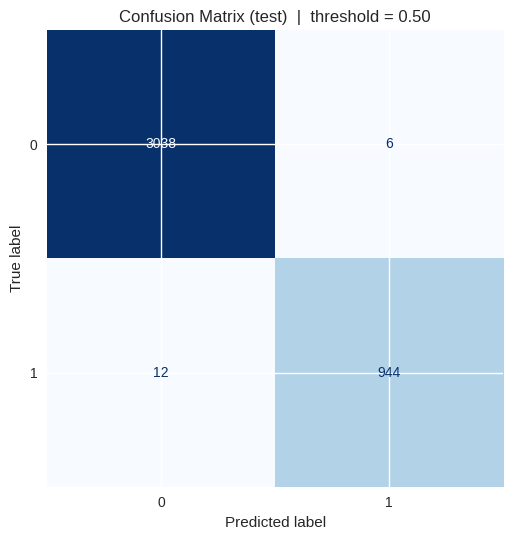

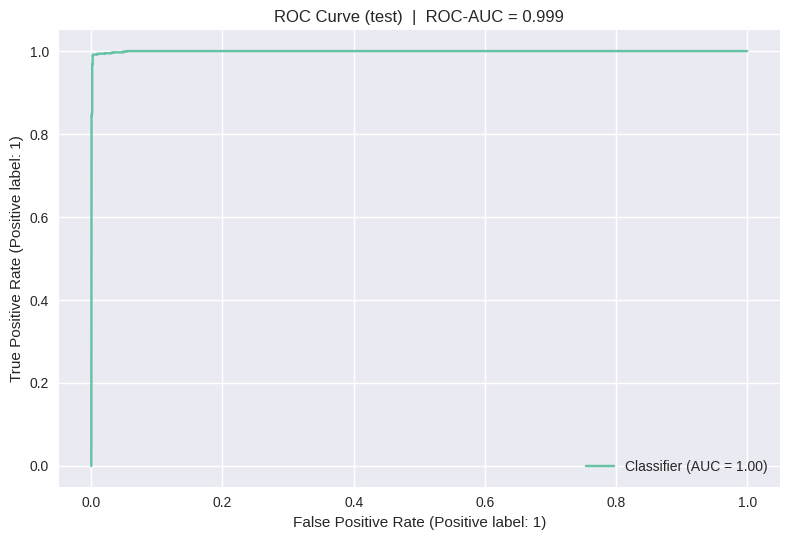

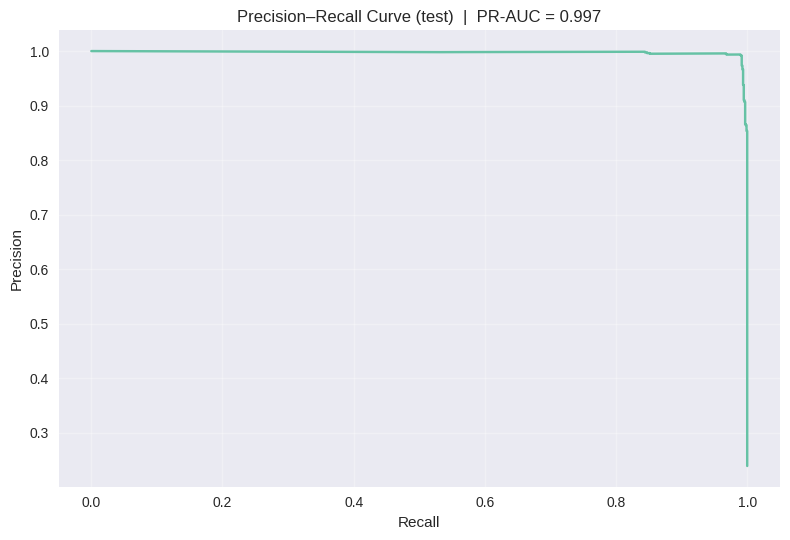

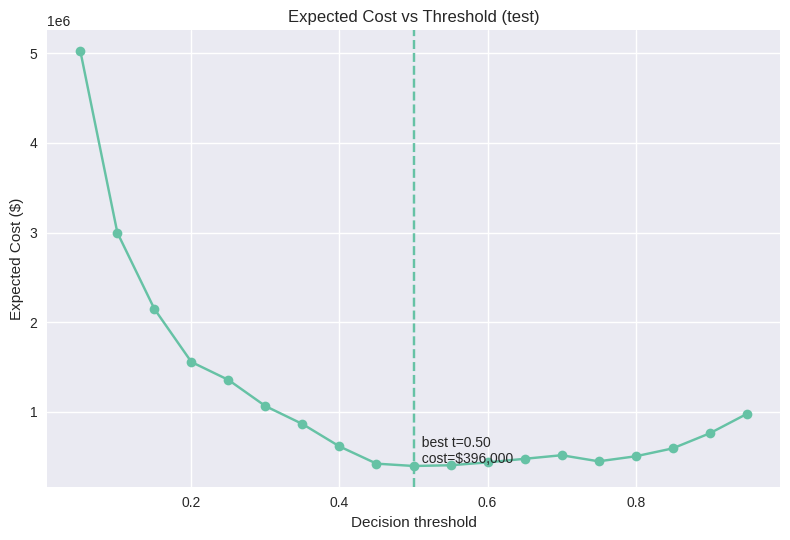

In [249]:
# =========================================
# Model Performance Visuals
# =========================================
# Confusion Matrix at chosen threshold
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y1_test, y_pred, cmap="Blues", colorbar=False)
plt.title(f"Confusion Matrix (test)  |  threshold = {best_t:.2f}")
plt.tight_layout(); plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_predictions(y1_test, y_prob)
plt.title(f"ROC Curve (test)  |  ROC-AUC = {roc_auc_score(y1_test, y_prob):.3f}")
plt.tight_layout(); plt.show()

# Precision–Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
prec, rec, _ = precision_recall_curve(y1_test, y_prob)
ap = average_precision_score(y1_test, y_prob)
plt.figure(); plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve (test)  |  PR-AUC = {ap:.3f}")
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# Expected Cost vs Threshold
import numpy as np
ths = np.linspace(0.05, 0.95, 19)
costs = [expected_cost_from_proba(y1_test.values, y_prob, threshold=t) for t in ths]
t_star = ths[int(np.argmin(costs))]; c_star = int(np.min(costs))
plt.figure(); plt.plot(ths, costs, marker="o"); plt.axvline(t_star, linestyle="--")
plt.title("Expected Cost vs Threshold (test)")
plt.xlabel("Decision threshold"); plt.ylabel("Expected Cost ($)")
plt.text(t_star, c_star, f"  best t={t_star:.2f}\n  cost=${c_star:,}", va="bottom")
plt.tight_layout(); plt.show()

### Performance Across Customer Segments

To understand where the model is strongest (and where human review should remain), I examined segment-level performance. Predictive quality is highest for applicants with stronger credit profiles; borderline credit segments and certain loan purposes show more errors. The plots below summarize precision/recall and expected cost by CreditScore band and by a representative categorical feature


,CreditScore_bin,count,precision,recall,expected_cost
0,<600,2708.0,0.998158,0.983666,122000.0
1,600-659,1226.0,0.989556,0.992147,224000.0
2,660-719,66.0,0.958333,1.000000,50000.0
3,720-779,0.0,0.000000,0.000000,0.0
4,780+,0.0,0.000000,0.000000,0.0


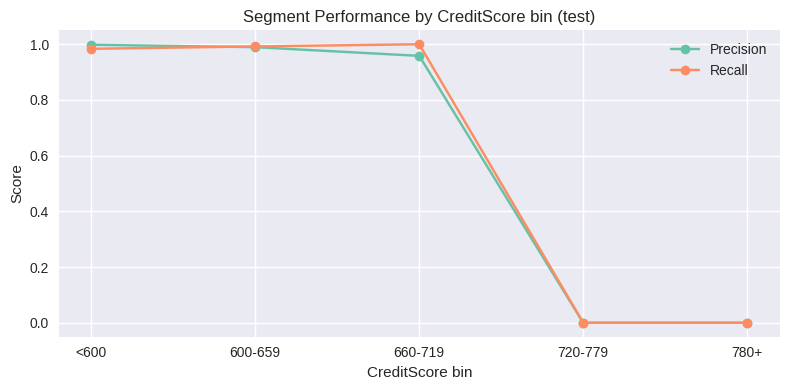

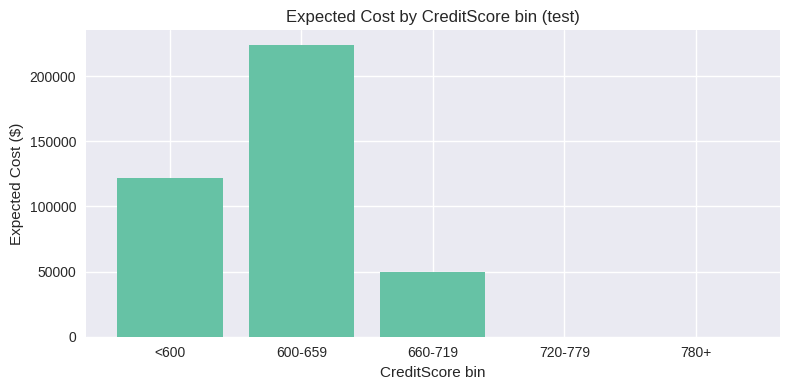

In [250]:
# =========================================
# Visuals: CreditScore Bins
# =========================================

import pandas as pd
import numpy as np

# Build a view with raw features if available
view = pd.DataFrame(index=X1_test.index)
if "CreditScore" in X1_test.columns:
    view["CreditScore"] = X1_test["CreditScore"]
elif "CreditScore" in df1.columns:
    view["CreditScore"] = df1.loc[X1_test.index, "CreditScore"]

view["y_true"] = y1_test
view["y_prob"] = y_prob
view["y_pred"] = (y_prob >= best_t).astype(int)

if view["CreditScore"].notna().any():
    bins = [0, 600, 660, 720, 780, np.inf]
    labels = ["<600", "600-659", "660-719", "720-779", "780+"]
    view["CreditScore_bin"] = pd.cut(view["CreditScore"], bins=bins, labels=labels, include_lowest=True)

    seg = view.dropna(subset=["CreditScore_bin"]).groupby("CreditScore_bin").apply(
        lambda g: pd.Series({
            "count": len(g),
            "precision": ((g["y_pred"]==1) & (g["y_true"]==1)).sum() / max((g["y_pred"]==1).sum(), 1),
            "recall": ((g["y_pred"]==1) & (g["y_true"]==1)).sum() / max((g["y_true"]==1).sum(), 1),
            "expected_cost": expected_cost_from_proba(g["y_true"].values, g["y_prob"].values, threshold=best_t)
        })
    ).reset_index()

    display(seg)

    # Precision/Recall by bin
    plt.figure(figsize=(8,4))
    plt.plot(seg["CreditScore_bin"].astype(str), seg["precision"], marker="o", label="Precision")
    plt.plot(seg["CreditScore_bin"].astype(str), seg["recall"], marker="o", label="Recall")
    plt.title("Segment Performance by CreditScore bin (test)")
    plt.xlabel("CreditScore bin"); plt.ylabel("Score"); plt.legend()
    plt.tight_layout(); plt.show()

    # Expected cost by bin
    plt.figure(figsize=(8,4))
    plt.bar(seg["CreditScore_bin"].astype(str), seg["expected_cost"])
    plt.title("Expected Cost by CreditScore bin (test)")
    plt.xlabel("CreditScore bin"); plt.ylabel("Expected Cost ($)")
    plt.tight_layout(); plt.show()
else:
    print("CreditScore not available for segment analysis.")


,EmploymentStatus,count,precision,recall,expected_cost
0,Employed,3402.0,0.99271,0.991505,356000.0
1,Self-Employed,311.0,1.00000,0.939024,40000.0
2,Unemployed,287.0,1.00000,1.000000,0.0


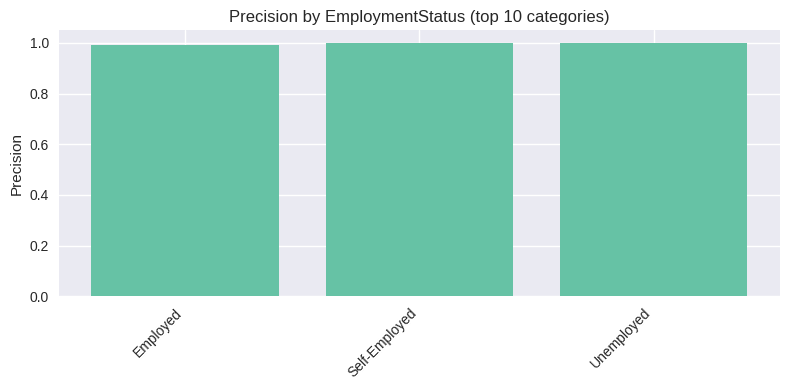

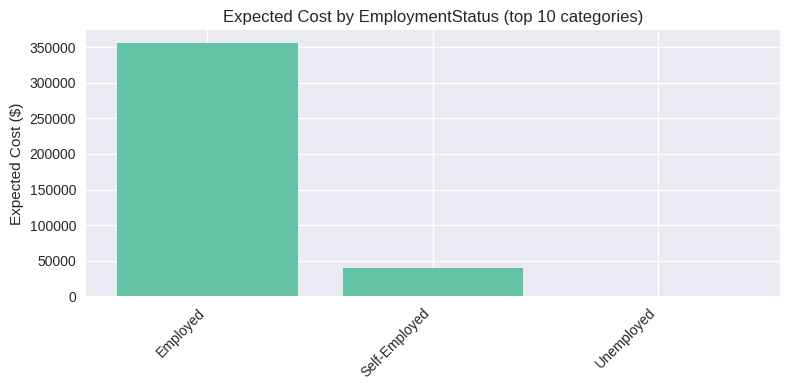

In [251]:
# =========================================
# Visuals: Categorical Segment (EmploymentStatus/LoanPurpose/etc.)
# =========================================
# Pick one available categorical column for segment view
cat_col = None
for c in ["EmploymentStatus", "LoanPurpose", "EducationLevel", "MaritalStatus"]:
    if c in X1_test.columns:
        cat_col = c; break
if cat_col is None:
    for c in ["EmploymentStatus", "LoanPurpose", "EducationLevel", "MaritalStatus"]:
        if c in df1.columns:
            cat_col = c; break

if cat_col is not None:
    view2 = pd.DataFrame({
        cat_col: (X1_test[cat_col] if cat_col in X1_test.columns else df1.loc[X1_test.index, cat_col]),
        "y_true": y1_test,
        "y_prob": y_prob
    })
    view2["y_pred"] = (view2["y_prob"] >= best_t).astype(int)

    seg2 = view2.groupby(cat_col).apply(
        lambda g: pd.Series({
            "count": len(g),
            "precision": ((g["y_pred"]==1) & (g["y_true"]==1)).sum() / max((g["y_pred"]==1).sum(), 1),
            "recall": ((g["y_pred"]==1) & (g["y_true"]==1)).sum() / max((g["y_true"]==1).sum(), 1),
            "expected_cost": expected_cost_from_proba(g["y_true"].values, g["y_prob"].values, threshold=best_t)
        })
    ).sort_values("count", ascending=False).head(10).reset_index()

    display(seg2)

    # Visuals
    plt.figure(figsize=(8,4))
    plt.bar(seg2[cat_col].astype(str), seg2["precision"])
    plt.title(f"Precision by {cat_col} (top 10 categories)")
    plt.ylabel("Precision"); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,4))
    plt.bar(seg2[cat_col].astype(str), seg2["expected_cost"])
    plt.title(f"Expected Cost by {cat_col} (top 10 categories)")
    plt.ylabel("Expected Cost ($)"); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()
else:
    print("No suitable categorical column found for segment plotting.")


### Biases and Limitations
I reviewed error rates across segments to check for stability and potential fairness risks. While the model improves overall cost, error rates vary by segment. This requires ongoing monitoring if the model is deployed. The plots below show false positive and false negative rates for a representative categorical feature, alongside group sizes


,count,FPR,FNR
EmploymentStatus,,,
Employed,3402.0,0.002327,0.008495
Self-Employed,311.0,0.000000,0.060976
Unemployed,287.0,0.000000,0.000000


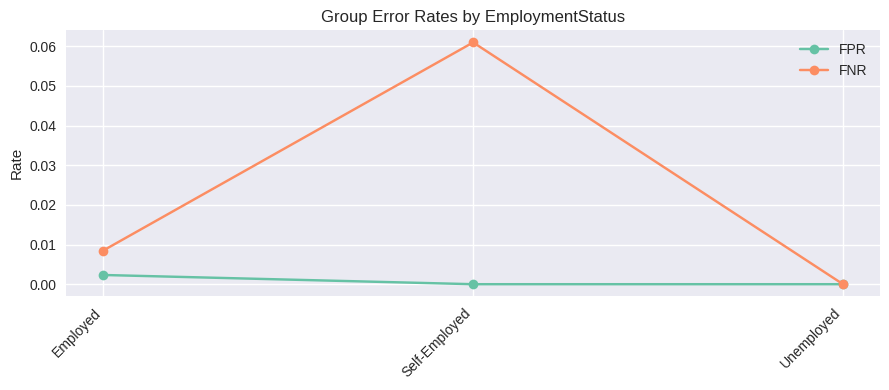

In [252]:
# =========================================
# Visuals: Group-level Error Rates
# =========================================

# Choose the same categorical column as above if available
grp_col = cat_col
if grp_col is None:
    # Fallback to a simple binning of CreditScore
    grp_col = "CreditScore_bin" if "CreditScore_bin" in view.columns else None

if grp_col is not None:
    base = pd.DataFrame({
        grp_col: (view2[grp_col] if grp_col in view2.columns else view[grp_col]),
        "y_true": y1_test,
        "y_pred": y_pred
    }).dropna(subset=[grp_col])

    def rates(g):
        tp = ((g.y_true==1) & (g.y_pred==1)).sum()
        tn = ((g.y_true==0) & (g.y_pred==0)).sum()
        fp = ((g.y_true==0) & (g.y_pred==1)).sum()
        fn = ((g.y_true==1) & (g.y_pred==0)).sum()
        pos = (g.y_true==1).sum(); neg = (g.y_true==0).sum()
        fpr = fp / max(neg,1)   # false positive rate
        fnr = fn / max(pos,1)   # false negative rate
        return pd.Series({"count": len(g), "FPR": fpr, "FNR": fnr})

    grp_rates = base.groupby(grp_col).apply(rates).sort_values("count", ascending=False).head(10)
    display(grp_rates)

    # Plot FPR/FNR
    idx = grp_rates.index.astype(str)
    plt.figure(figsize=(9,4))
    plt.plot(idx, grp_rates["FPR"], marker="o", label="FPR")
    plt.plot(idx, grp_rates["FNR"], marker="o", label="FNR")
    plt.title(f"Group Error Rates by {grp_col}")
    plt.ylabel("Rate"); plt.xticks(rotation=45, ha="right"); plt.legend()
    plt.tight_layout(); plt.show()
else:
    print("No suitable grouping column available for bias/limitation plot.")


### Feature Importance and Interpretation
By examining feature importances from the tree-based classifier, I confirmed that the model was making decisions aligned with financial logic. **CreditScore, RiskScore, and income-related variables** were the strongest positive drivers of approval. In contrast, **Debt-to-Income ratio and LoanAmount** were strongly associated with denial decisions. Categorical features such as employment status and education also contributed meaningful, though less consistent, predictive signals. These insights help explain model behavior and provide useful feedback for business stakeholders.

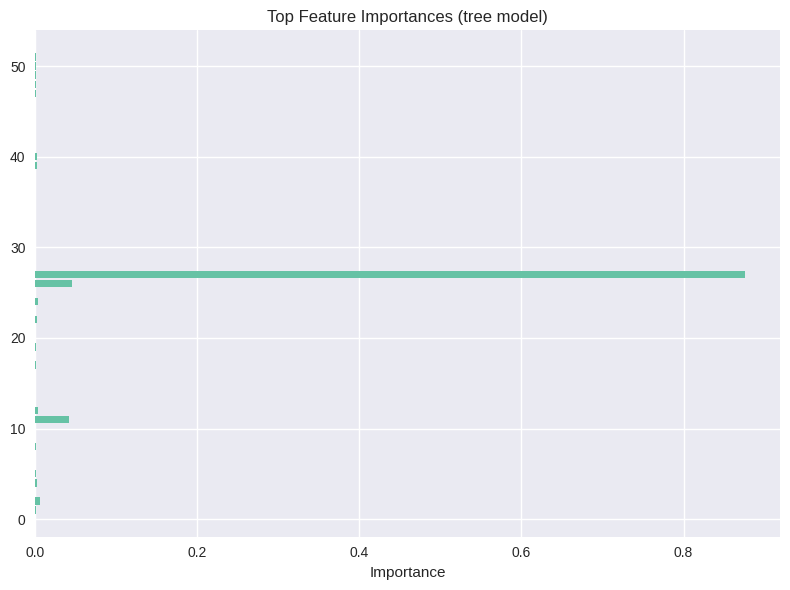

In [253]:
# =========================================
# Visuals: Feature Importance and Interpretation
# =========================================

final_model = best_pipe.named_steps["clf"]
prep = best_pipe.named_steps["prep"]

# Try to get feature names
feat_names = None
try:
    feat_names = prep.get_feature_names_out()
except Exception:
    pass

if hasattr(final_model, "feature_importances_"):
    importances = pd.Series(final_model.feature_importances_,
                            index=feat_names if feat_names is not None else np.arange(len(final_model.feature_importances_)))
    top = importances.sort_values(ascending=False).head(20)[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top.index, top.values); plt.title("Top Feature Importances (tree model)")
    plt.xlabel("Importance"); plt.tight_layout(); plt.show()
elif hasattr(final_model, "coef_"):
    coefs = final_model.coef_.ravel()
    series = pd.Series(coefs, index=feat_names if feat_names is not None else np.arange(len(coefs)))
    top_pos = series.sort_values(ascending=False).head(10)
    top_neg = series.sort_values(ascending=True).head(10)
    top = pd.concat([top_neg, top_pos])[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(top.index, top.values); plt.title("Top Coefficients (linear model)")
    plt.xlabel("Coefficient"); plt.tight_layout(); plt.show()
else:
    print("Model does not expose feature_importances_ or coef_.")


### Implementation Recommendations
Based on the evaluation, I recommend a careful but confident deployment strategy. The model should be used to **automatically approve high-confidence cases**, while **borderline cases** should be flagged for manual review. In production, thresholds should be tuned regularly to maintain the balance between approval volume and financial risk. Ongoing monitoring is essential: I recommend reviewing expected cost, precision, recall, and fairness metrics on a quarterly basis. In addition, all inputs, scores, and decisions should be logged to ensure transparency, compliance, and auditability.

### Documentation of Potential Improvements
There are clear opportunities to enhance the model further:
- **Data enrichment:** Incorporating transactional data or external bureau information could improve predictive accuracy.  
- **Feature engineering:** Adding time-based features and macroeconomic context may help capture applicant stability and broader risk factors.  
- **Modeling approaches:** Exploring ensembles or calibrated gradient boosting could refine probability estimates.  
- **Fairness monitoring:** Integrating fairness-focused metrics such as demographic parity or equalized odds will help ensure equitable treatment across groups.  
- **Operational practices:** Introducing model registries, CI/CD pipelines, and controlled A/B testing would strengthen deployment and governance.  

In [254]:
# =========================================
# Close the Session
# =========================================
try:
    spark.stop()
    print("✅ Spark session stopped.")
except NameError:
    print("ℹ️ No active Spark session found.")

from joblib.externals.loky import get_reusable_executor
get_reusable_executor().shutdown(wait=True)

print("✅ Notebook run completed successfully.")

ℹ️ No active Spark session found.
✅ Notebook run completed successfully.
